### Segment Any change

In [1]:
from segment_any_change.main import BitemporalMatching, PointQueryMecanism
from segment_any_change.utils import load_levircd_sample, show_img, load_img
from segment_any_change.mask_items import ImgType

import numpy as np
from typing import Union
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import cv2

/home/MDizier/miniforge3/envs/magic_pen/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
def flush_memory():
    import gc
    import torch
    gc.collect()
    torch.cuda.empty_cache()
flush_memory()

In [3]:
def show_pair_img(img_A:  Union[str, np.ndarray], img_B: Union[str, np.ndarray]):
    if isinstance(img_A, str):
        img_A = load_img(img_A)
    if isinstance(img_B, str):
        img_B = load_img(img_B)
    pair = np.hstack((img_A, img_B))
    show_img(pair)

#### Import samples LEVIR-CD

In [4]:
pair_img = load_levircd_sample(1, seed=42)
path_label,path_A, path_B = pair_img.iloc[0]

In [5]:
img_A = load_img(path_A)
img_B = load_img(path_B)

### Run SegAnyChange

In [6]:
sam_params = {
    "points_per_side": 32,
    "points_per_batch": 64,
    "pred_iou_thresh": 0.88,
    "stability_score_thresh": 0.95,
    "stability_score_offset": 1.0,
    "box_nms_thresh": 0.7,
    "crop_n_layers": 0,
    "crop_nms_thresh": 0.7,
    "crop_overlap_ratio": 512 / 1500,
    "crop_n_points_downscale_factor": 1,
    "point_grids": None,
    "min_mask_region_area": 0,
    "output_mode": "binary_mask",
}

In [49]:
filter_change_proposals = "otsu"

matcher = BitemporalMatching(model_type="vit_h", **sam_params)
items_change = matcher.run(
    img_A=load_img(path_A), 
    img_B=load_img(path_B), 
    filter_method=filter_change_proposals
)

== process crops ==
== process batch for point : 64 ==
------
Output predict masks torch : torch.Size([64, 3, 1024, 1024])
init  masks data: 192
Output filter IoU masks data: 50
Output filter stability masks data: 30
Output filter mask_threshold: 30
Output filter boundary 30
== process batch for point : 64 ==
------
Output predict masks torch : torch.Size([64, 3, 1024, 1024])
init  masks data: 192
Output filter IoU masks data: 37
Output filter stability masks data: 20
Output filter mask_threshold: 20
Output filter boundary 20
== process batch for point : 64 ==
------
Output predict masks torch : torch.Size([64, 3, 1024, 1024])
init  masks data: 192
Output filter IoU masks data: 58
Output filter stability masks data: 28
Output filter mask_threshold: 28
Output filter boundary 28
== process batch for point : 64 ==
------
Output predict masks torch : torch.Size([64, 3, 1024, 1024])
init  masks data: 192
Output filter IoU masks data: 58
Output filter stability masks data: 35
Output filter m

2024-04-30 15:53:58,465 - INFO ::  Proposal Matching ...


nan values ci 10
nan values ci1 11
50.48008750958405


#### Extract sample point from mask

In [8]:
[len(_.meta) for _ in items_change]

[6,
 6,
 6,
 6,
 2,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 2,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 2,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 2,
 6,
 6]

In [9]:
items_change[0].meta

{'area': 680,
 'bbox': [398, 0, 24, 27],
 'predicted_iou': 0.9544848203659058,
 'point_coords': [[400.0, 16.0]],
 'stability_score': 0.9883551597595215,
 'crop_box': [0, 0, 1024, 1024]}

In [10]:
items_change[4].meta

[{'area': 1662,
  'bbox': [356, 0, 65, 27],
  'predicted_iou': 0.9412738084793091,
  'point_coords': [[400.0, 16.0]],
  'stability_score': 0.9534472823143005,
  'crop_box': [0, 0, 1024, 1024]},
 [{'area': 1662,
   'bbox': [356, 0, 65, 27],
   'predicted_iou': 0.9412738084793091,
   'point_coords': [[400.0, 16.0]],
   'stability_score': 0.9534472823143005,
   'crop_box': [0, 0, 1024, 1024]},
  {'area': 1039,
   'bbox': [356, 0, 41, 24],
   'predicted_iou': 0.9449158906936646,
   'point_coords': [[368.0, 16.0]],
   'stability_score': 0.9904305934906006,
   'crop_box': [0, 0, 1024, 1024]}]]

In [23]:
idx=45
input_points = np.array([items_change[idx].meta["point_coords"]])
input_labels = np.array([[1]])

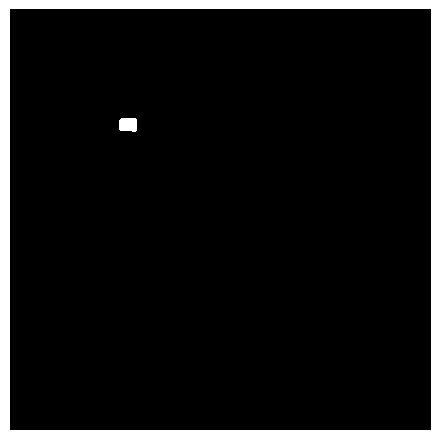

In [24]:
show_img(items_change[idx].mask)

#### Query Prompt Mecanism

In [51]:
idx=45
input_points = np.array([items_change[idx].meta["point_coords"]])
input_labels = np.array([[1]])

In [52]:
from copy import deepcopy

In [91]:
filter_query_sim = 70
items_change_copy = deepcopy(items_change)

sim_obj_change = PointQueryMecanism(
                    predictor=matcher.mask_generator.predictor,
                    items_change=items_change_copy
                ).run(
                    points=input_points,
                    method_filtering=filter_query_sim,
                    image=None,
                    labels=input_labels
                )
print(len(sim_obj_change))

70
154


In [92]:
query_sim_angle = [_.chgt_angle for _ in  sim_obj_change]

Text(0.5, 1.0, "Distribution des angles des vecteurs de changement par rapport à l'objet issu du prompt")

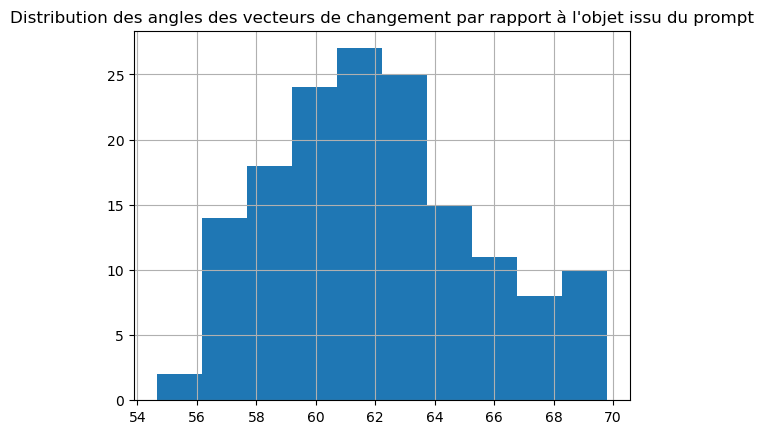

In [93]:
pd.Series(query_sim_angle).hist()
plt.title("Distribution des angles des vecteurs de changement par rapport à l'objet issu du prompt")

In [94]:
from segment_any_change.mask_items import ListProposal

def show_sim_change_from_prompt(img: np.ndarray, input_prompt: np.ndarray, sim_items: ListProposal):
    def convert_bbox_plt(bbox):
        """Matplotib rectangle bbox format : xminymin,h,w"""
        return ((bbox[0], bbox[1]), *bbox[2:])
    show_img(img)
    ax = plt.gca()
    boxes = [convert_bbox_plt(_.meta["bbox"]) for _ in sim_items if isinstance(_.meta, dict)]
    colors = plt.cm.rainbow(np.linspace(0, 1, len(boxes)))
    for bbox, c in zip(boxes, colors):
        # add rectangle to plot
        ax.add_patch(Rectangle(*bbox,
                     edgecolor=c,
                     fill=False,
                     lw=2))
    ax.scatter(*input_prompt.ravel(),
           color='green',
           marker='*',
           s=300,
           edgecolor='white',
           linewidth=0.8)

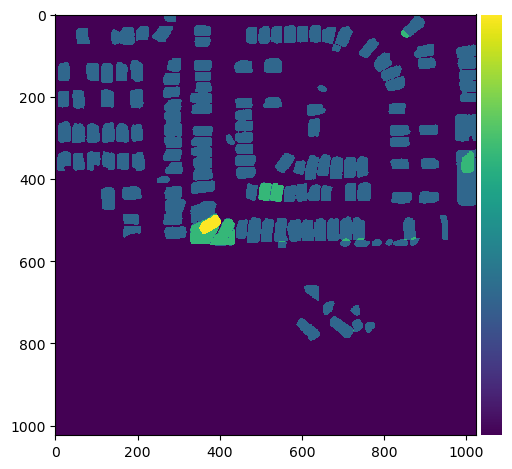

In [95]:
show_img(np.sum(np.stack([_.mask for _ in sim_obj_change]), axis=0))

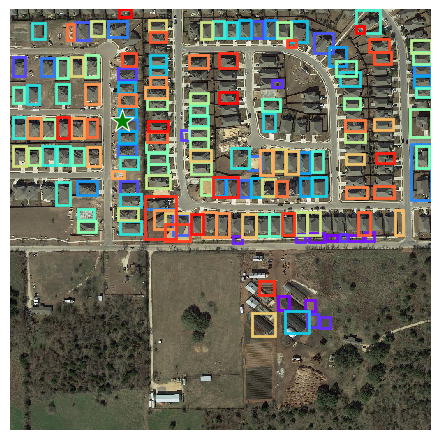

In [96]:
show_sim_change_from_prompt(img_B, input_points, sim_obj_change)

* Comparer avec l'ensemble des changements
* wtf les multiples bbox pour un même masque (*meta*)

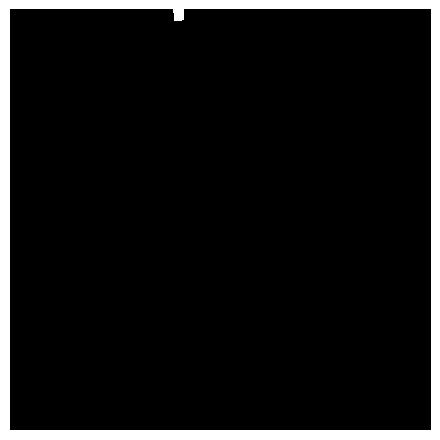

In [81]:
show_img(items_change[4].mask)

## Annexes

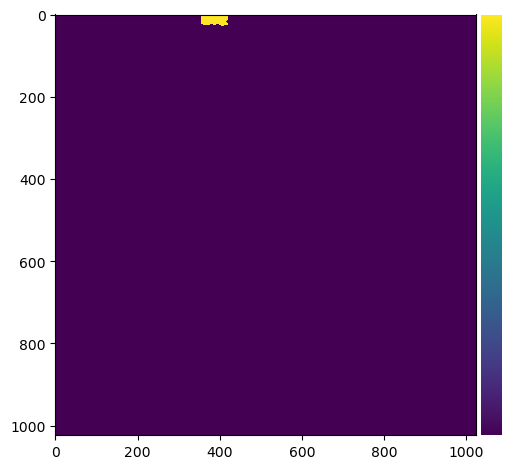

In [65]:
example = items_change[4]
show_img(example.mask)
ax = plt.gca()
ax.scatter(*example.meta[0]["point_coords"][0], color='green', marker='*', s=20)
ax.scatter(*example.meta[1][0]["point_coords"][0], color='green', marker='*', s=20)

bbox1 = example.meta[0]["bbox"]
bbox1 = ((bbox1[:2]), *bbox1[2:])

bbox2 = example.meta[1][0]["bbox"]
bbox2 = ((bbox2[:2]), *bbox2[2:])

colors = plt.cm.rainbow(np.linspace(0, 1, len(boxes)))
ax.add_patch(Rectangle(*bbox1,
             edgecolor = colors[np.random.choice(colors.shape[0], size=1)],
             fill=False,
             lw=2))

ax.add_patch(Rectangle(*bbox2,
             edgecolor = colors[np.random.choice(colors.shape[0], size=1)],
             fill=False,
             lw=2))

* meta is the same through items changes

In [29]:
from segment_any_change.utils import flatten
boxes = [_.meta for _ in items_change if isinstance(_.meta, list)]
boxes = flatten(boxes)

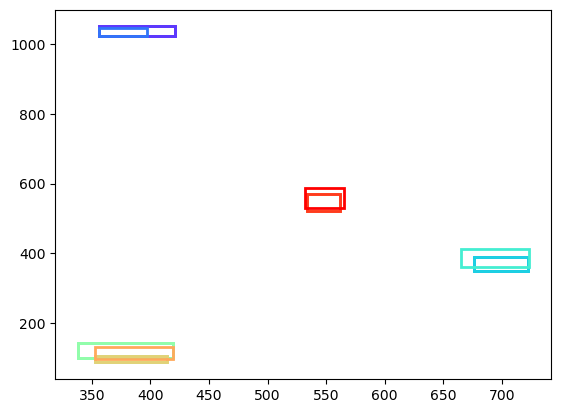

In [34]:
from matplotlib.patches import Rectangle

boxes = [_.meta for _ in items_change if isinstance(_.meta, list)]
boxes = [_["bbox"] for _ in list(flatten(boxes))]

boxes = [((_[0], 1024-_[1]), *_[2:]) for _ in boxes]

colors = plt.cm.rainbow(np.linspace(0, 1, len(boxes)))

fig, ax = plt.subplots()

#create simple line plot
ax.plot()from matplotlib.patches import Rectangle

for bbox,c in zip(boxes, colors):
    #add rectangle to plot
    ax.add_patch(Rectangle(*bbox,
                 edgecolor = c,
                 fill=False,
                 lw=2))

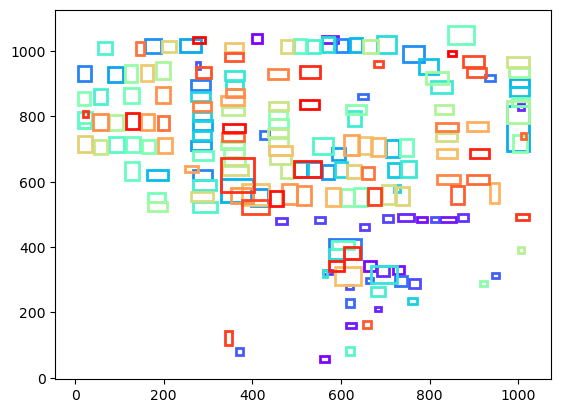

In [24]:
from matplotlib.patches import Rectangle

boxes = [_.meta["bbox"] for _ in items_change if isinstance(_.meta, dict)]
boxes = [((_[0], 1024-_[1]), *_[2:]) for _ in boxes]

colors = plt.cm.rainbow(np.linspace(0, 1, len(boxes)))

fig, ax = plt.subplots()

#create simple line plot
ax.plot()
for bbox,c in zip(boxes, colors):
    #add rectangle to plot
    ax.add_patch(Rectangle(*bbox,
                 edgecolor = c,
                 fill=False,
                 lw=2))

In [47]:
input_points

array([[[272., 272.]]])

In [48]:
input_points[0][0]

array([272., 272.])

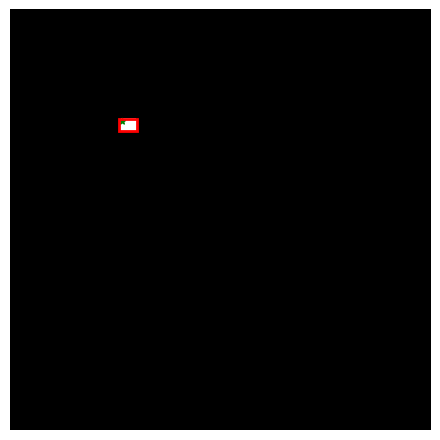

In [49]:
show_img(items_change[idx].mask)
ax = plt.gca()
ax.scatter(*input_points[0][0], color='green', marker='*', s=20)

bbox = items_change[idx].meta["bbox"]
bbox = ((bbox[:2]), *bbox[2:])

colors = plt.cm.rainbow(np.linspace(0, 1, len(boxes)))
ax.add_patch(Rectangle(*bbox,
             edgecolor = colors[np.random.choice(colors.shape[0], size=1)],
             fill=False,
             lw=2))


In [51]:
len(sim_obj_change)

191

/home/MDizier/miniforge3/envs/magic_pen/lib/python3.10/site-packages/skimage/io/_plugins/matplotlib_plugin.py:149: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


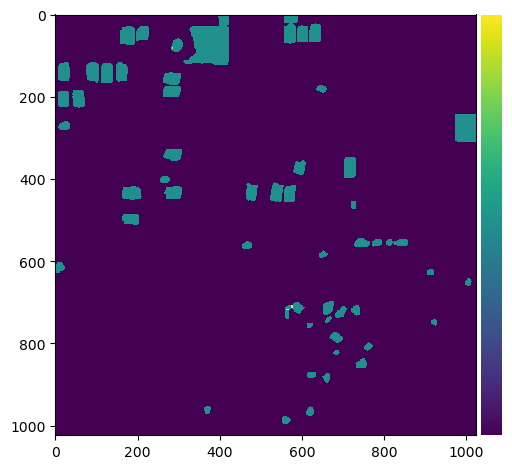

In [42]:
show_img(np.sum(np.stack([_.mask for _ in sim_obj_change]), axis=0))

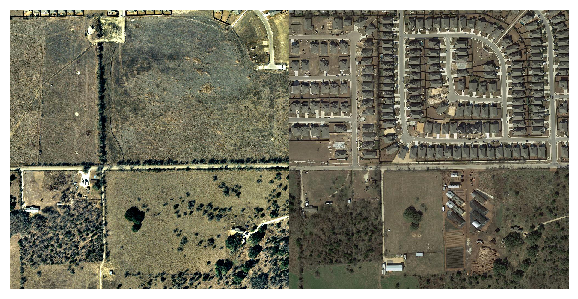

In [43]:
show_pair_img(img_A, img_B)

#### Output SegAnyChange - deprecated return see src

In [9]:
masks_emb_t_mA = res["mask_embedding"]["t->t+1"][0]
masks_emb_t1_mA = res["mask_embedding"]["t->t+1"][1]

masks_emb_t_mB = res["mask_embedding"]["t+1->t"][0]
masks_emb_t1_mB = res["mask_embedding"]["t+1->t"][1]

In [10]:
img_emb_A = res["A"]["img_embedding"]
img_emb_B = res["B"]["img_embedding"]

In [11]:
mask_Af = res["A"]["global_mask"]
mask_Bf = res["B"]["global_mask"]

ci = res["conf"]["t->t+1"]
ci1 = res["conf"]["t+1->t"]

In [13]:
mask_A = segany.get_mask_proposal(ImgType.A)
mask_B = segany.get_mask_proposal(ImgType.B)

### Exploration modules Any Change

In [ ]:
print(np.linalg.norm(img_emb_A))
print(np.linalg.norm(img_emb_B))


In [ ]:
print(np.linalg.norm(masks_emb_t_mA[0]))
print(np.linalg.norm(masks_emb_t1_mA[0]))


In [ ]:
print(np.linalg.norm(masks_emb_t_mB[34]))
print(np.linalg.norm(masks_emb_t1_mB[34]))

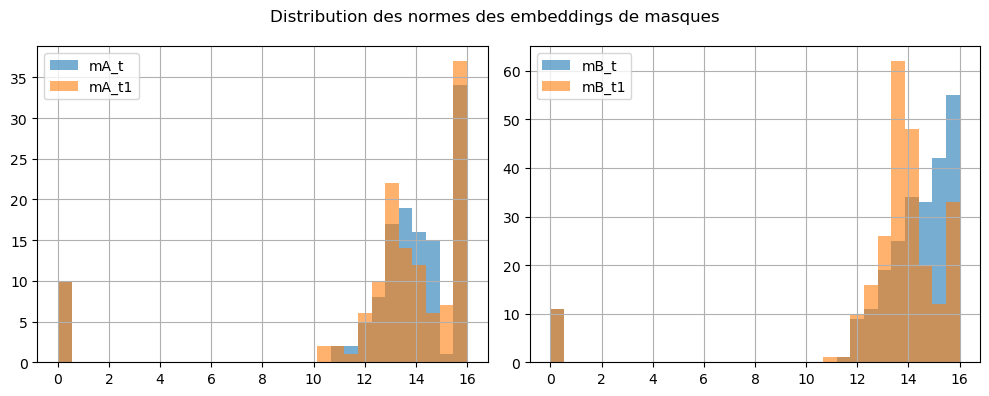

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(10,4))

pd.Series([np.linalg.norm(_) for _ in masks_emb_t_mA]).hist(ax=axes[0], label="mA_t", alpha=0.6, bins=30)
pd.Series([np.linalg.norm(_) for _ in masks_emb_t1_mA]).hist(ax=axes[0], label="mA_t1", alpha=0.6, bins=30)
axes[0].legend()

pd.Series([np.linalg.norm(_) for _ in masks_emb_t_mB]).hist(ax=axes[1], label="mB_t", alpha=0.6, bins=30)
pd.Series([np.linalg.norm(_) for _ in masks_emb_t1_mB]).hist(ax=axes[1], label="mB_t1", alpha=0.6, bins=30)
axes[1].legend()

fig.suptitle("Distribution des normes des embeddings de masques")
plt.tight_layout()

* Investiguer vectur norm null
* shift mB_t1

In [19]:
np.sqrt(256)

16.0

### Visualisation des masques

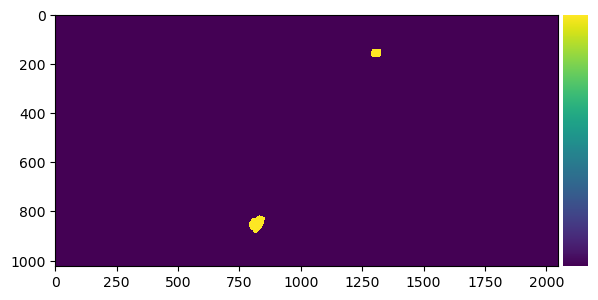

In [21]:
show_pair_img(mask_A[12], mask_B[12])

* Il faut un mapping spatial entre les masques A et B

* ci calculé via mask_A
* ciA calculé via mask_B

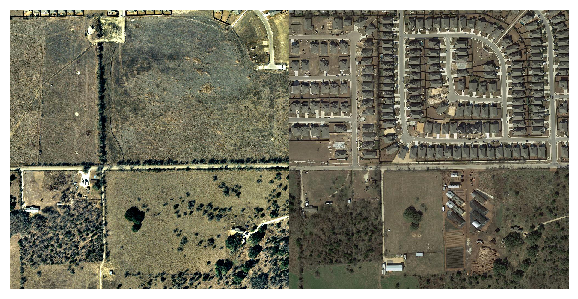

In [22]:
show_pair_img(img_A, img_B)

In [23]:
stack_mA = np.stack(mask_A)
stack_mB = np.stack(mask_B)

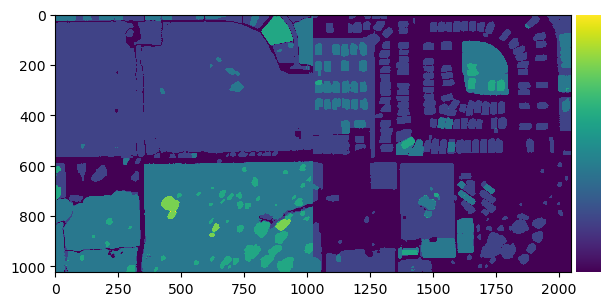

In [24]:
show_pair_img(
    np.sum(stack_mA, axis=0), 
    np.sum(stack_mB, axis=0)
)

### Fusion

##### Méthode 1 : individuals union (concat)
* Change proposal == 1 masque
* Filtrer les masques couvrant une même zone dans un second temps
* Pb :
    * 1 masque == 1 confidence score 
    * Pas vraiment de matching "bitemporal" => si via la similarité
 
      
##### Methode 2 : union geometry
* change proposal : union of mask on same area (same area to be define as a threshold)
* Pb :
    * Define threshold of Iou for Union
        * Union or selection of masks (min objets)
     
##### Methode 3 : individuals with union of score
* Change proposal == 1 masque
* Union (avg) des scores de confiance sur la zone
* Filtrer les masques couvrant une même zone dans un second temps

##### Methode 4 : concat and union of join masque
* join (union) geometry of same object mask (based on th IoU)
* otherwise consider 1 mask == 1 change proposal

Peut t on aggreger les ci avec les ci1 ? => pas les mêmes masks mais potentiellement les mêmes objets

* definition : 
    * zone de changement : définie une zone inter images

> The real-world change is defined at the same geographic location from time t to t + 1. This means that it is comparable only if two mask embeddings cover the approximate same geographic region

In [14]:
def rad_to_degre(x):
    return x*180/np.pi

def to_degre(x):
    return rad_to_degre(np.arccos(-x))

#### Methode 4

In [15]:
# identifcation of join areas
"""
join area == inter area == 0.8 of Union Area
"""

'\njoin area == inter area == 0.8 of Union Area\n'

In [16]:
from enum import Enum
class ImgType(Enum):
    A=1
    B=2

In [19]:
l = [1, 2, 3]
l.pop(0)

1

In [21]:
l.remove(2)

In [22]:
l

[3]

In [47]:
import itertools
from dataclasses import dataclass, field
from typing import List, Optional, Any, Dict, Optional



@dataclass
class ItemProposal:
    mask: np.ndarray
    confidence_score: float
    id: int = field(default_factory=itertools.count().__next__, init=False) # check how it works
    meta: List[Dict]
    chgt_angle: float = None
    from_img: List[ImgType]=None

    def __post_init__(self):
        if self.chgt_angle is None:
            self.chgt_angle = to_degre(self.confidence_score)
        
@dataclass
class ListProposal:
    items: Optional[List[ItemProposal]] = None
    index: int = 0

    def __post_init__(self) -> None:
        if self.items is None:
            self.items = []

    def add_item(self, item) -> None:
        if item.id not in [_.id for _ in self.items]:
            self.items.append(item)

    def rm_item(self, id: int) -> None:
        self.items = [_ for _ in self.items if _.id != id]

    def __getitem__(self, idx) -> ItemProposal:
        return self.items[idx]
    
    def __len__(self) -> int:
        return len(self.items)

        
def cover_same_zone(mask_A, mask_B, th=0.6) -> bool:
    inter_area = np.sum(np.logical_and(mask_A, mask_B))
    union_area = np.sum(np.logical_or(mask_A, mask_B))
    return inter_area > (union_area * th)

def create_union_object(item_A: ItemProposal, item_B: ItemProposal) -> ItemProposal:
    # filter on sim before merge ?
    return ItemProposal(mask=np.logical_or(item_A.mask, item_B.mask).astype(np.uint8), 
                        confidence_score=np.mean([item_A.confidence_score, item_B.confidence_score]), 
                        meta=[item_A.meta] + [item_B.meta], 
                        chgt_angle=np.mean([item_A.chgt_angle, item_B.chgt_angle]), 
                        from_img=[item_A.from_img, item_B.from_img])

print(f"nan values ci {np.sum(np.isnan(ci))}")
print(f"nan values ci1 {np.sum(np.isnan(ci1))}")

# nan value to be review

items_A = create_change_proposal_items(mask_Af, ci, ImgType.A)
items_B = create_change_proposal_items(mask_Bf, ci1, ImgType.B)


nan values ci 10
nan values ci1 11


In [32]:
mask_Af[0]

{'segmentation': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]),
 'area': 301105,
 'bbox': [340, 29, 683, 531],
 'predicted_iou': 1.0162211656570435,
 'point_coords': [[720.0, 112.0]],
 'stability_score': 0.9520628452301025,
 'crop_box': [0, 0, 1024, 1024]}

In [33]:
%%time
#deprecated"
filter_items = ListProposal()
track_id_union = set()
overlap = []

# speed-up items filtering on intersection - prevent futur large cartesian product
# to be improved
is_inter = lambda x,y: np.sum(np.logical_and(x, y)) > 1
for (it_A, it_B) in itertools.product(items_A, items_B):
    if is_inter(it_A.mask, it_B.mask):
        overlap.append((it_A, it_B))
        
# compute union on overlap pairs
for (it_A, it_B) in overlap:
    if cover_same_zone(it_A.mask, it_B.mask):
        filter_items.add_item(create_union_object(it_A, it_B))
        track_id_union.add(it_A.id)
        track_id_union.add(it_B.id)

# other union could be possible on existing union
#

# add masks A if not exists
for it_A in items_A:
    if it_A.id not in track_id_union:
        filter_items.add_item(it_A)

# add masks B if not exists
for it_B in items_B:
    if it_B.id not in track_id_union:
        filter_items.add_item(it_B)

CPU times: user 15 s, sys: 29.3 ms, total: 15.1 s
Wall time: 15.1 s


In [18]:
len(filter_items)

335

In [75]:
%%time
#deprecated
import multiprocessing as mp
filter_items = ListProposal()
track_id_union = set()
overlap = []

# speed-up items filtering on intersection - prevent futur large cartesian product
def is_inter(x,y):
    return np.sum(np.logical_and(x, y)) > 1

mask_A,mask_B = [_.mask for _ in items_A],[_.mask for _ in items_B]

with mp.Pool(processes=50) as pool:
    prod = list(itertools.product(mask_A, mask_B))
    results = pool.starmap(is_inter, prod)

CPU times: user 8.48 s, sys: 14.3 s, total: 22.8 s
Wall time: 30.4 s


### Fusion iterative des masques

In [48]:
%%time

filter_items = ListProposal()
track_id_union = set()
overlap = []

f_items = items_A + items_B

for insert_item in f_items:
    inserted = False
    for ref_item in filter_items:
        if cover_same_zone(insert_item.mask, ref_item.mask):
            filter_items.add_item(create_union_object(insert_item, ref_item))
            filter_items.rm_item(ref_item.id)
            inserted = True
    if not inserted:
        filter_items.add_item(insert_item)

CPU times: user 54.9 s, sys: 70.8 ms, total: 55 s
Wall time: 55 s


In [49]:
len(filter_items)

320

In [54]:
all_mask = [_.mask for _ in filter_items]
all_ci = [_.confidence_score for _ in filter_items]

sample_mask = [_.mask for _ in filter_items[:10]]
sample_ci = [_.confidence_score for _ in filter_items[:10]]

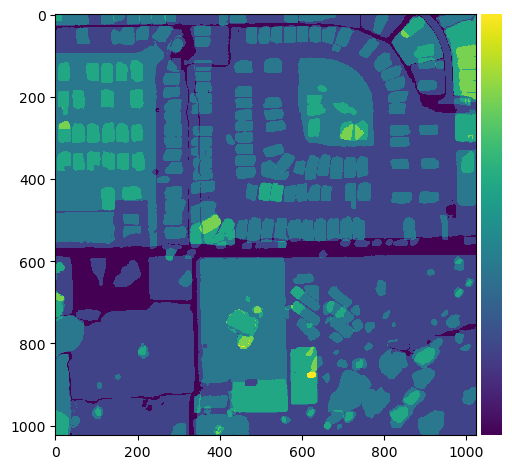

In [52]:
show_img(np.sum((np.stack(all_mask)), axis=0))

<Axes: >

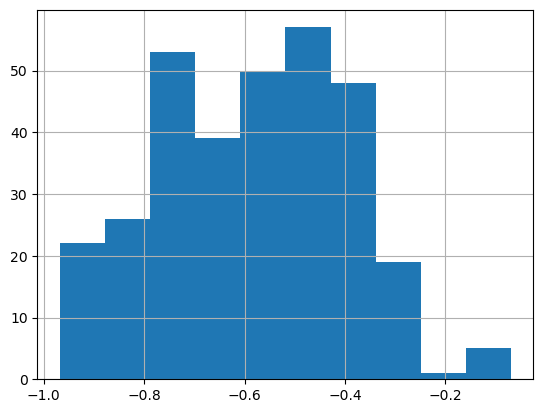

In [58]:
pd.Series(all_ci).hist()

In [25]:
np.quantile(all_ci, 0.25)

-0.7402088465530932

In [56]:
angle_chgt = [to_degre(_) for _ in all_ci]

<Axes: >

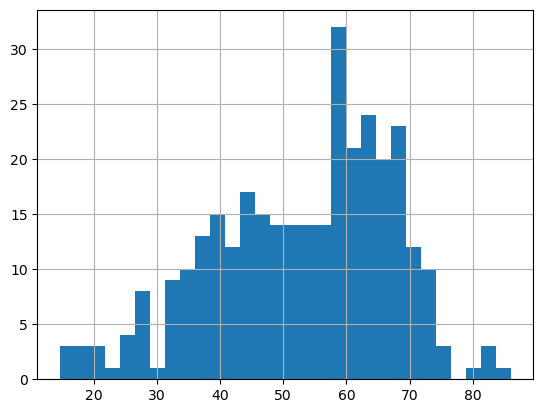

In [57]:
pd.Series(angle_chgt).hist(bins=30)

In [59]:
from skimage.filters import threshold_otsu

In [60]:
threshold_otsu(np.array(angle_chgt))

50.48126123142784

In [61]:
np.round(48.89, -1)

50.0

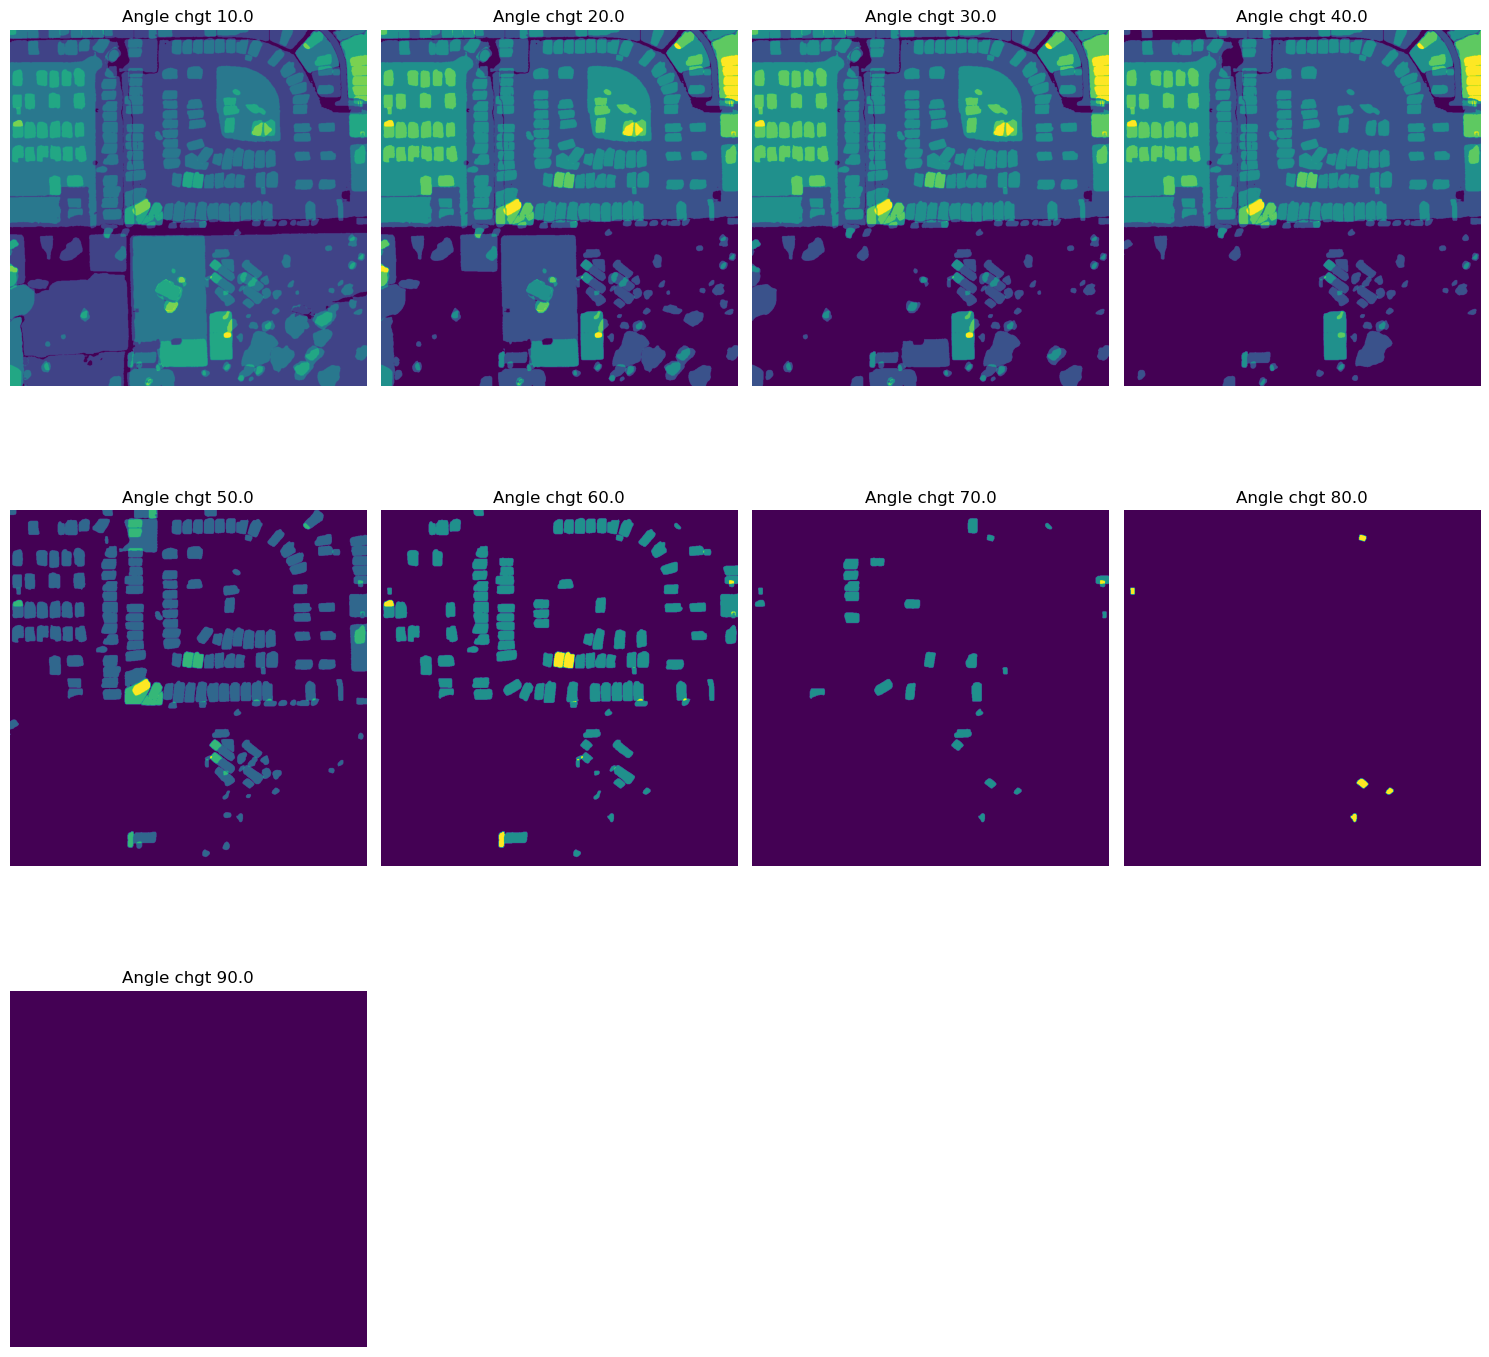

In [62]:
fig, axes = plt.subplots(3, 4, figsize=(15, 15))
axes = axes.ravel()

angle_th = sorted(set([np.round(_.chgt_angle, -1) for _ in filter_items]))

_ = [axes[_].set_visible(False) for _ in [9, 10, 11]]

for i, a in enumerate(angle_th):
    mask_stack = np.zeros((1024, 1024))
    q_mask = [_.mask for _ in filter_items if _.chgt_angle >= a]
    if q_mask:
        mask_stack = np.sum((np.stack(q_mask)), axis=0)
    axes[i].imshow(mask_stack)
    axes[i].set_axis_off()
    axes[i].set_title(f"Angle chgt {a:.1f}")
    
plt.tight_layout()

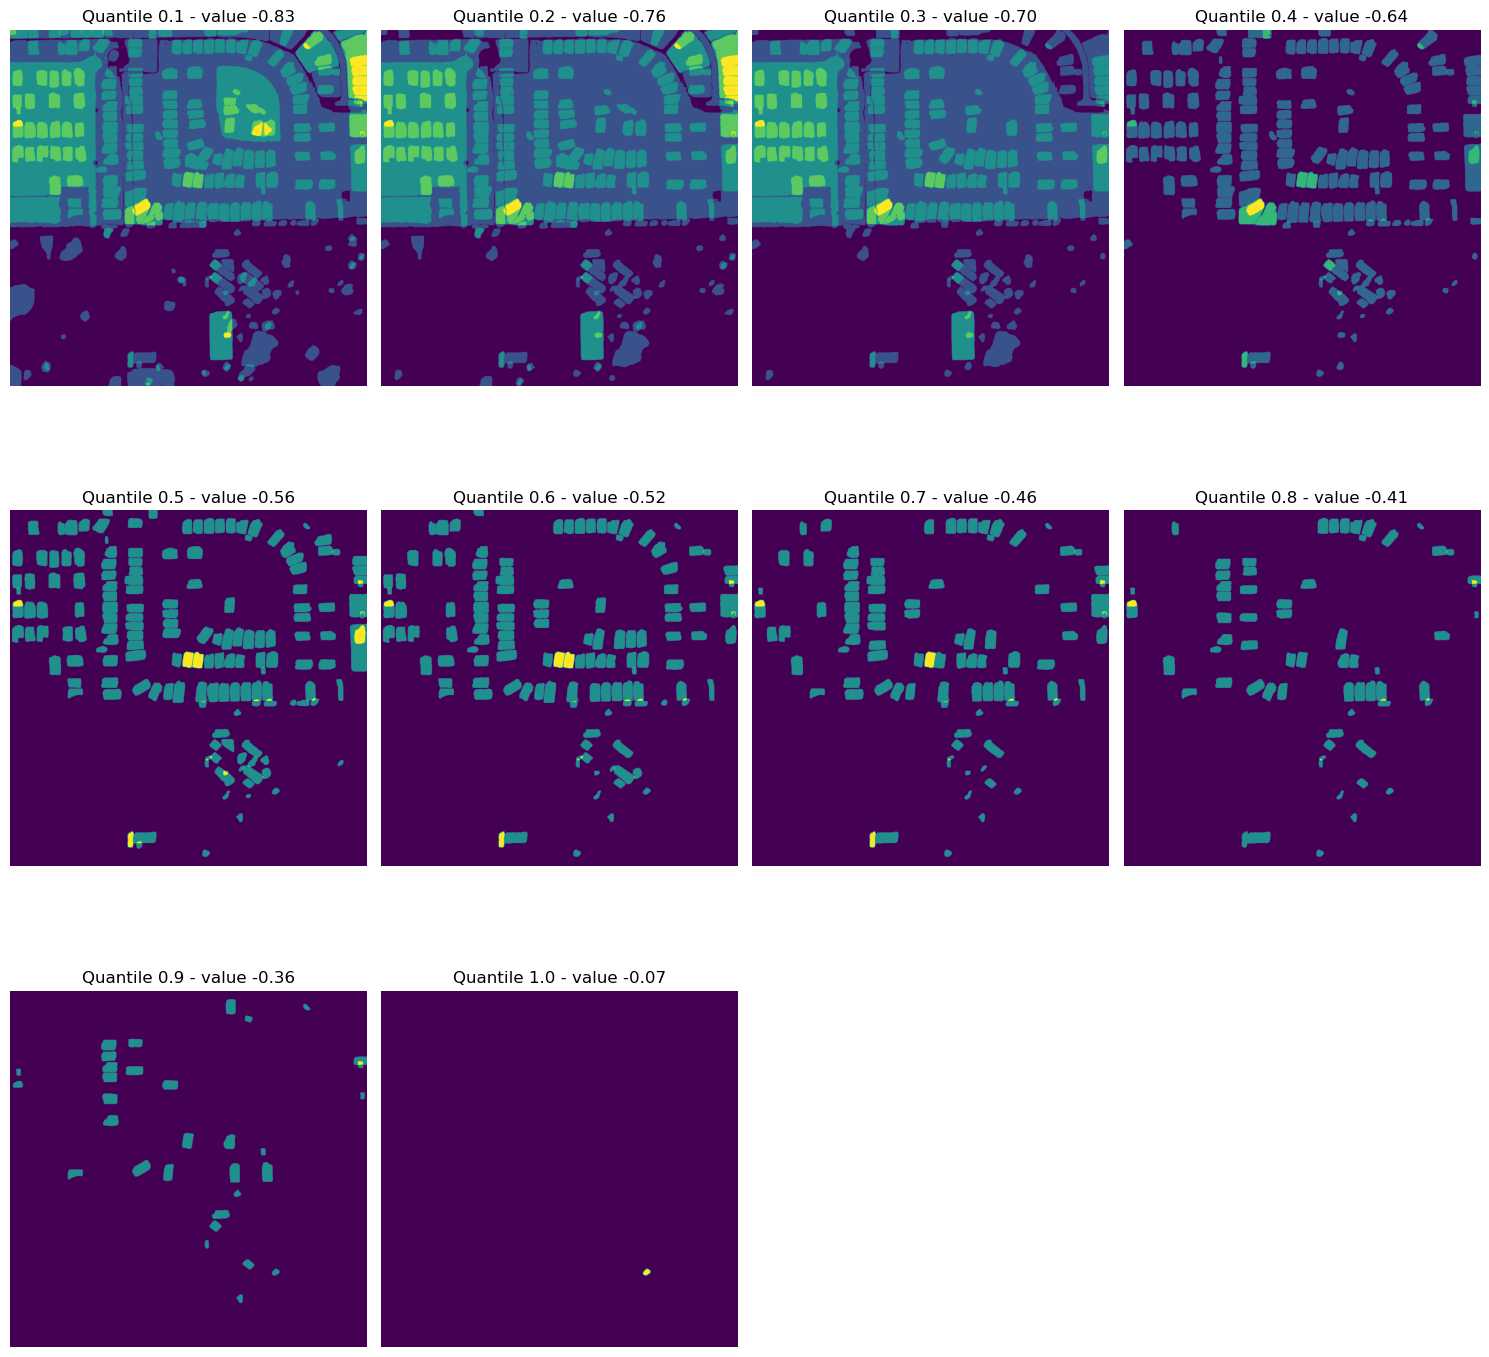

In [63]:
fig, axes = plt.subplots(3, 4, figsize=(15, 15))
axes = axes.ravel()
_ = [axes[_].set_visible(False) for _ in [10, 11]]

for i, q in enumerate(np.linspace(0.1, 1, 10)):
    mask_stack = np.zeros((1024, 1024))
    v = np.quantile([_.confidence_score for _ in filter_items], q)
    q_mask = [_.mask for _ in filter_items if _.confidence_score >= v]
    if q_mask:
        mask_stack = np.sum((np.stack(q_mask)), axis=0)
    axes[i].imshow(mask_stack)
    axes[i].set_axis_off()
    axes[i].set_title(f"Quantile {q:.1f} - value {v:.2f}")
    
plt.tight_layout()

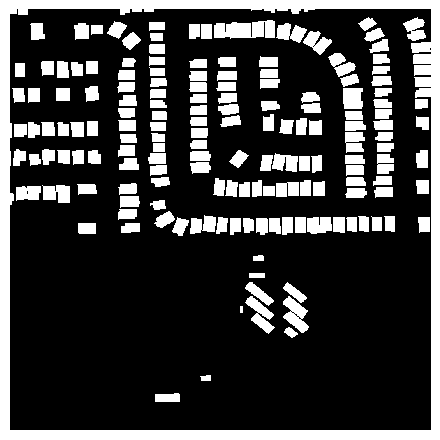

In [39]:
label = load_img(path_label)
show_img(label)

### Clustering changes